In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import seaborn as sns

Load edeck files (organized by year, and by basin)

In [2]:
year_sel = 2018
etracks_dir = '../SHIPS_edeck_VALID/{year_sel}/'.format(year_sel=year_sel)
fnames_all = [os.path.join(etracks_dir, f) for f in os.listdir(etracks_dir) if f.endswith('.dat')]

In [3]:
fnames_all

['../SHIPS_edeck_VALID/2018/eep122018.dat',
 '../SHIPS_edeck_VALID/2018/eep082018.dat',
 '../SHIPS_edeck_VALID/2018/eepB52018.dat',
 '../SHIPS_edeck_VALID/2018/eal042018.dat',
 '../SHIPS_edeck_VALID/2018/eep242018.dat',
 '../SHIPS_edeck_VALID/2018/eepE42018.dat',
 '../SHIPS_edeck_VALID/2018/eepA62018.dat',
 '../SHIPS_edeck_VALID/2018/eepD62018.dat',
 '../SHIPS_edeck_VALID/2018/eepA92018.dat',
 '../SHIPS_edeck_VALID/2018/ealA22018.dat',
 '../SHIPS_edeck_VALID/2018/ealB92018.dat',
 '../SHIPS_edeck_VALID/2018/ealA42018.dat',
 '../SHIPS_edeck_VALID/2018/eepA22018.dat',
 '../SHIPS_edeck_VALID/2018/eep042018.dat',
 '../SHIPS_edeck_VALID/2018/eepA52018.dat',
 '../SHIPS_edeck_VALID/2018/ealC42018.dat',
 '../SHIPS_edeck_VALID/2018/eep022018.dat',
 '../SHIPS_edeck_VALID/2018/eal022018.dat',
 '../SHIPS_edeck_VALID/2018/ealA72018.dat',
 '../SHIPS_edeck_VALID/2018/eal142018.dat',
 '../SHIPS_edeck_VALID/2018/eepB32018.dat',
 '../SHIPS_edeck_VALID/2018/ealC72018.dat',
 '../SHIPS_edeck_VALID/2018/eep1

#### General Format of Files
BASIN  CYCLONE NUMBER  DATE (YYYYMMDDHH)   ProbFormat   Tech   TAU    LAT N/S    Lon E/W    PROB

ProbFormat: 
* TR: track
* IN: intensity
* RI: rapid intensification
* RW: rapid weakening
* WR: wind radii
* PR: pressure
* GN: TC genesis probability
* GS: TC genesis shape
* ER: eyewall replacement

Tech: objective technique

TAU: forecast period (0-168 hrs)

Lat N/S: 0-900 [tenths of degrees]

Lon E/W: 0-1800 [tenths of degrees]

Prob:  probability of ProbItem, 0-100%

##### Intensity Probability
* ProbItem: Wind speed (bias adjusted), 0-300 kts
* TY:  level of TC development; currently unused
* Half_Range: Half the probability range (radius), 0-50 kts

###### Rapid Intensification Probability / Rapid Weakening Probability
* ProbItem: Intensity change, 0-300 kts
* V: final intensity, 0-300 kts
* Initials: forecaster initials
* RIstartTAU: RI start time, 0-168 hours
* RIstopTAU: RI stop time, 0-168 hrs

Create empty dataframes so we can reformat and save data as csv file

In [4]:
#
IN_valid_names = {'BASIN':[],'CYCLONE NO':[],'DATE':[],'ProbFormat':[],
                'Tech':[],'TAU':[],'LAT':[],'LON':[],'ProbItem':[],'TY':[],
                            'foo':[],'HalfRange':[]}
RI_valid_names = {'BASIN':[],'CYCLONE NO':[],'DATE':[],'ProbFormat':[],
                'Tech':[],'TAU':[],'LAT':[],'LON':[],'ProbItem':[],'Intensity Change':[],
                            'V':[],'Initials':[],'RIstartTAU':[],'RIstopTAU':[]}
etracks_valid_RI = pd.DataFrame.from_dict(RI_valid_names,orient='columns')
etracks_valid_IN = pd.DataFrame.from_dict(IN_valid_names,orient='columns')
etracks_valid_RW = pd.DataFrame.from_dict(RI_valid_names,orient='columns')


In [5]:
for i in np.arange(0,len(fnames_all)):
    #i = 30
    fname = fnames_all[i]
    #i_basin = BASIN[i]
    fname_full = open(fname)
    lines = fname_full.readlines()

    for iline in np.arange(0,len(lines)):
        #iline = 37
        line_sel = lines[iline].split()
        i_pf = line_sel[3]
        #print(i_pf)
        if i_pf == 'RI,':
            #print('RI!')
            etracks_valid_RI = etracks_valid_RI.append(pd.Series(line_sel, index = etracks_valid_RI.columns),ignore_index=True)
        elif i_pf == 'IN,':
            #print('Intensity')
            etracks_valid_IN = etracks_valid_IN.append(pd.Series(line_sel, index = etracks_valid_IN.columns),ignore_index=True)
        #
        elif i_pf == 'RW,':
            print('RW')
            etracks_valid_RW = etracks_valid_RW.append(pd.Series(line_sel, index = etracks_valid_RW.columns),ignore_index=True)


In [6]:
fname

'../SHIPS_edeck_VALID/2018/eepB12018.dat'

In [19]:
etracks_valid_IN#.sort_values('CYCLONE NO')['CYCLONE NO'].unique()
#fnames_all

,BASIN,CYCLONE NO,DATE,ProbFormat,Tech,TAU,LAT,LON,ProbItem,TY,foo,HalfRange
0,EAST_PACIFIC,12,2018-08-04 06:00:00,IN,IVCN,12,,,68,29,,9
1,EAST_PACIFIC,12,2018-08-04 06:00:00,IN,IVCN,24,,,68,36,,15
2,EAST_PACIFIC,12,2018-08-04 06:00:00,IN,IVCN,36,,,68,44,,21
3,EAST_PACIFIC,12,2018-08-04 06:00:00,IN,IVCN,48,,,68,53,,24
4,EAST_PACIFIC,12,2018-08-04 06:00:00,IN,IVCN,72,,,68,72,,28
...,...,...,...,...,...,...,...,...,...,...,...,...
27976,EAST_PACIFIC,B1,2018-06-06 00:00:00,IN,IVRI,36,,,68,57,,18
27977,EAST_PACIFIC,B1,2018-06-06 00:00:00,IN,IVRI,48,,,68,64,,20
27978,EAST_PACIFIC,B1,2018-06-06 00:00:00,IN,IVRI,72,,,68,74,,24
27979,EAST_PACIFIC,B1,2018-06-06 00:00:00,IN,IVRI,96,,,68,76,,28


### Clean up data a bit.  
* Remove extraneous commas
* Replace basin names with full names
* Convert dates into datetime format

In [8]:
# Remove commas
etracks_valid_RI = etracks_valid_RI.replace(",", "", regex=True)
etracks_valid_RW = etracks_valid_RW.replace(",", "", regex=True)
etracks_valid_IN = etracks_valid_IN.replace(",","",regex = True)

In [9]:
etracks_valid_RI['DATE']

Series([], Name: DATE, dtype: float64)

In [10]:
# Dates
etracks_valid_RI['DATE'] = pd.to_datetime(etracks_valid_RI['DATE'].astype(str),format='%Y%m%d%H')
etracks_valid_RW['DATE'] = pd.to_datetime(etracks_valid_RW['DATE'].astype(str),format='%Y%m%d%H')
etracks_valid_IN['DATE'] = pd.to_datetime(etracks_valid_IN['DATE'].astype(str),format='%Y%m%d%H')


In [11]:
# Change basin names
etracks_valid_RI = etracks_valid_RI.replace("AL","ATLANTIC",regex=True)
etracks_valid_RI = etracks_valid_RI.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_RI = etracks_valid_RI.replace("CP","CENTRAL_PACIFIC",regex=True)
#
etracks_valid_RW = etracks_valid_RW.replace("AL","ATLANTIC",regex=True)
etracks_valid_RW = etracks_valid_RW.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_RW = etracks_valid_RW.replace("CP","CENTRAL_PACIFIC",regex=True)
#
etracks_valid_IN = etracks_valid_IN.replace("AL","ATLANTIC",regex=True)
etracks_valid_IN = etracks_valid_IN.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_IN = etracks_valid_IN.replace("CP","CENTRAL_PACIFIC",regex=True)


In [12]:
etracks_valid_RI.to_csv('DATA/etracks_RI_{year_sel}.csv'.format(year_sel=year_sel))
etracks_valid_IN.to_csv('DATA/etracks_IN_{year_sel}.csv'.format(year_sel=year_sel))
#etracks_valid_RI.to_csv('etracks_RI.csv')


In [13]:
etracks_valid_IN['BASIN'].unique()

array(['EAST_PACIFIC', 'ATLANTIC'], dtype=object)

<AxesSubplot:>

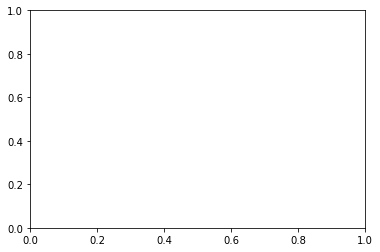

In [14]:
import seaborn as sns
etracks_test = etracks_valid_RI.copy()
etracks_test['ProbItem'] = etracks_test['ProbItem'].astype(int)
sns.kdeplot(data=etracks_test,x='ProbItem',hue='BASIN')

In [15]:
foo = etracks_test.where((etracks_test['RIstopTAU'].astype(int) <= 24)
                        & (etracks_test['Intensity Change'].astype(int) > 0)).dropna(how='all')

<AxesSubplot:>

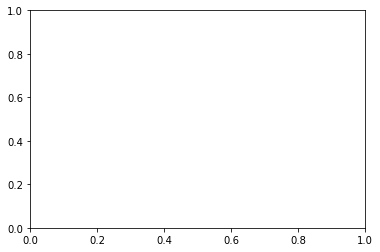

In [16]:
sns.histplot(data=foo,x='ProbItem',binwidth=10)

In [17]:
np.histogram(foo['ProbItem'],)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [18]:
etracks_test.set_index(['BASIN','DATE','Tech']).xs(('EAST_PACIFIC','2020-07-22 06:00:00','RIOD'))

KeyError: ('EAST_PACIFIC', '2020-07-22 06:00:00', 'RIOD')

In [ ]:
etracks_test[(etracks_test['ProbItem'] > 70) & (etracks_test['Intensity Change'].astype(int)==40)]

In [ ]:
# etracks_